In [1]:
import pandas as pd

In [2]:
# Load the data
retail = pd.read_excel('Online Retail.xlsx')

retail.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


Check the Data

In [7]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [10]:
retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [11]:
# Check for missing values
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [13]:
# Drop rows with missing values
retail = retail.dropna(subset=['CustomerID', 'Description'])

retail.isnull()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [14]:
# Remove duplictes
retail = retail.drop_duplicates()

In [16]:
# Remove negative quantities and unit prices
retail = retail[(retail['Quantity'] > 0) & (retail['UnitPrice'] > 0)]

In [18]:
# Create a Total Price column
retail['TotalPrice'] = retail['Quantity'] * retail['UnitPrice']
retail.head()

/var/folders/1n/6k_c10z17p16t66tb2m255pc0000gn/T/ipykernel_32963/39451997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['TotalPrice'] = retail['Quantity'] * retail['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [21]:
# Extract month, day, hour for time analysis
retail['Month'] = retail['InvoiceDate'].dt.month_name()
retail['DayOfWeek'] = retail['InvoiceDate'].dt.day_name()
retail['Hour'] = retail['InvoiceDate'].dt.hour

/var/folders/1n/6k_c10z17p16t66tb2m255pc0000gn/T/ipykernel_32963/3263793790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['Month'] = retail['InvoiceDate'].dt.month_name()
/var/folders/1n/6k_c10z17p16t66tb2m255pc0000gn/T/ipykernel_32963/3263793790.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['DayOfWeek'] = retail['InvoiceDate'].dt.day_name()
/var/folders/1n/6k_c10z17p16t66tb2m255pc0000gn/T/ipykernel_32963/3263793790.py:4: SettingWithCopyWarning: 
A value is trying to be set on a co

Check for outliers

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

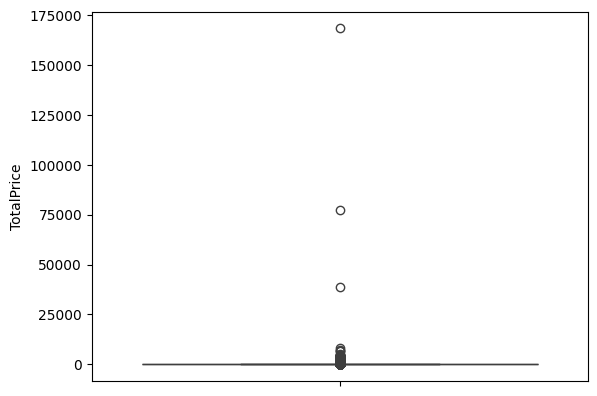

In [25]:
sns.boxplot(retail['TotalPrice'])
plt.show()

In [27]:
# Top Customers
top_customers = retail.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
top_customers

CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194390.79
16446.0    168472.50
14911.0    143711.17
12415.0    124914.53
14156.0    117210.08
17511.0     91062.38
16029.0     80850.84
12346.0     77183.60
Name: TotalPrice, dtype: float64

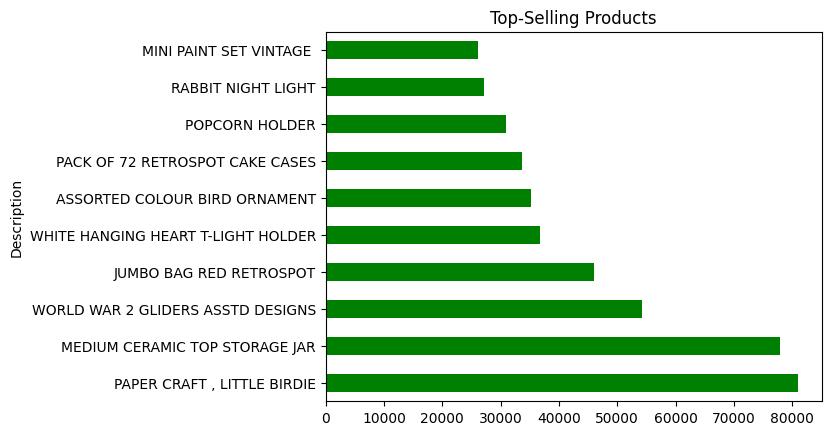

In [57]:
# Most popular product
popular_products = retail.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
popular_products.plot(kind='barh', title = 'Top-Selling Products', color='green')

plt.show()

<Axes: title={'center': 'Monthly Revenue'}, xlabel='InvoiceDate'>

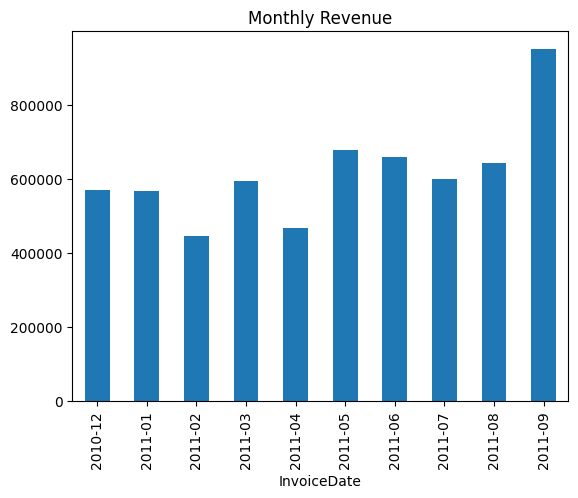

In [43]:
# Monthly Revenue
monthly_revenue = retail.groupby(retail['InvoiceDate'].dt.to_period('M'))['TotalPrice'].sum().head(10)
monthly_revenue.plot(kind='bar', title='Monthly Revenue')

In [53]:
# Average Order Value (AOV)
aov = retail.groupby('InvoiceNo')['TotalPrice'].sum().mean()
aov

479.56016047917126

In [55]:
# Customer Frequency(Orders per Customer)
customer_orders = retail.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False)
customer_orders

CustomerID
12748.0    209
14911.0    201
17841.0    124
13089.0     97
14606.0     93
          ... 
15314.0      1
15313.0      1
15308.0      1
15307.0      1
15300.0      1
Name: InvoiceNo, Length: 4338, dtype: int64

In [42]:
# Repeat Customer Rate
repeat_customers = customer_orders[customer_orders > 1].count()
repeat_customer_rate = repeat_customers /  retail['CustomerID'].nunique()

repeat_customer_rate


0.6558321807284463

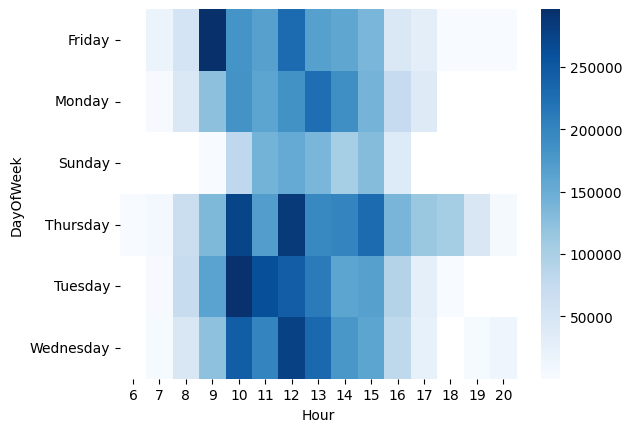

In [58]:
# Sales by Day and Hour

pivot = retail.pivot_table(index='DayOfWeek', columns='Hour', values='TotalPrice', aggfunc='sum')
sns.heatmap(pivot, cmap='Blues')

plt.show()

In [60]:
retail.to_csv("cleaned_customer_data.csv", index=False)